# Build a model to predict the ads for classifying whether your target audience will buy the product or not.

# Objective: -
Classifying social media ads means analyzing your social media ads for finding the most profitable customers for your product who are more likely to buy the product. Sometimes the product you are offering is not suitable for all people when it comes to age and income. For example, a person between the ages of 20 and 25 may like to spend more on smartphone covers than a person between the ages of 40 and 45.

Likewise, a high-income person can afford to spend more on luxury goods than a low-income person. So this is how a business can determine whether a person will buy their product or not by classifying their social media ads. 

This task is important for every advertising agency because the commercial value of promotions on the Internet depends only on how the user responds to them. 

The goal of this challenge is to build a machine learning model that predicts and classify social media ads. Classifying social media ads means analyzing your social media ads for finding the most profitable customers for your product who are more likely to buy the product. 

# Dataset: -

The dataset is openly available on Kaggle.

Attribute Information:
1. the age of the target audience
2. the estimated salary of the target audience
3. and whether the target audience has purchased the product or not

# Step 1: Import all the required libraries

- __Pandas__ : In computer programming, pandas is a software library written for the Python programming language for data manipulation and analysis and storing in a proper way. In particular, it offers data structures and operations for manipulating numerical tables and time series
- __Sklearn__ : Scikit-learn (formerly scikits.learn) is a free software machine learning library for the Python programming language. It features various classification, regression and clustering algorithms including support vector machines, random forests, gradient boosting, k-means and DBSCAN, and is designed to interoperate with the Python numerical and scientific libraries NumPy and SciPy. The library is built upon the SciPy (Scientific Python) that must be installed before you can use scikit-learn.
- __Pickle__ : Python pickle module is used for serializing and de-serializing a Python object structure. Pickling is a way to convert a python object (list, dict, etc.) into a character stream. The idea is that this character stream contains all the information necessary to reconstruct the object in another python script.
- __Seaborn__ : Seaborn is a Python data visualization library based on matplotlib. It provides a high-level interface for drawing attractive and informative statistical graphics.
- __Matplotlib__ : Matplotlib is a plotting library for the Python programming language and its numerical mathematics extension NumPy. It provides an object-oriented API for embedding plots into applications using general-purpose GUI toolkits like Tkinter, wxPython, Qt, or GTK.

In [3]:
#Loading libraries 
import pandas as pd
import seaborn as sns
import pickle
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score
from sklearn.preprocessing import scale 
from sklearn.linear_model import LinearRegression, Ridge, RidgeCV, Lasso, LassoCV
from sklearn.model_selection import KFold, cross_val_score, train_test_split
import warnings

warnings.filterwarnings('ignore')

# Step 2 : Read dataset and basic details of dataset
Goal:- In this step we are going to read the dataset, view the dataset and analysis the basic details like total number of rows and columns, what are the column data types and see to need to create new column or not.


In this stage we are going to read our problem dataset and have a look on it.

In [5]:
#loading the dataset
try:
    df = pd.read_csv('C:/Users/Sakshi Rohida/Desktop/deepak sir ML projects/Social_Media_Ads_Classification/data/social.csv') #Path for the file
    print('Data read done successfully...')
except (FileNotFoundError, IOError):
    print("Wrong file or file path")   

Data read done successfully...


In [6]:
# To view the content inside the dataset we can use the head() method that returns a specified number of rows, string from the top. 
# The head() method returns the first 5 rows if a number is not specified.
df.head()

,Age,EstimatedSalary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0
3,27,57000,0
4,19,76000,0


# Step3: Data Preprocessing

**Why need of Data Preprocessing?**

Preprocessing data is an important step for data analysis. The following are some benefits of preprocessing data:

 - It improves accuracy and reliability. Preprocessing data removes missing or inconsistent data values resulting from human or computer error, which can improve the accuracy and quality of a dataset, making it more reliable.
 - It makes data consistent. When collecting data, it's possible to have data duplicates, and discarding them during preprocessing can ensure the data values for analysis are consistent, which helps produce accurate results.
 - It increases the data's algorithm readability. Preprocessing enhances the data's quality and makes it easier for machine learning algorithms to read, use, and interpret it.

After we read the data, we can look at the data using:

In [7]:
# count the total number of rows and columns.
print ('The train data has {0} rows and {1} columns'.format(df.shape[0],df.shape[1]))

The train data has 400 rows and 3 columns


#### By analysing the problem statement and the dataset, we get to know that the target variable is "Clicked on Ad" column which says if the ad is clicked then it is 1 or if it is not clicked its 0.

In [8]:
df['Purchased'].value_counts()

0    257
1    143
Name: Purchased, dtype: int64

#### The df.value_counts() method counts the number of types of values a particular column contains. 

In [9]:
df.shape

(400, 3)

#### The df.shape method shows the shape of the dataset. 

We can identify that out of the 1000 rows, 5083 are valued as 0 and 4917 are valued as 1.

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   Age              400 non-null    int64
 1   EstimatedSalary  400 non-null    int64
 2   Purchased        400 non-null    int64
dtypes: int64(3)
memory usage: 9.5 KB


#### The df.info() method prints information about a DataFrame including the index dtype and columns, non-null values and memory usage. 

In [11]:
df.iloc[1]

Age                   35
EstimatedSalary    20000
Purchased              0
Name: 1, dtype: int64

####  df.iloc[ ] is primarily integer position based (from 0 to length-1 of the axis), but may also be used with a boolean array. The iloc property gets, or sets, the value(s) of the specified indexes.

### Data Type Check for every column

**Why data type check is required?**

Data type check helps us with understanding what type of variables our dataset contains. It helps us with identifying whether to keep that variable or not. If the dataset contains contiguous data, then only float and integer type variables will be beneficial and if we have to classify any value then categorical variables will be beneficial.

In [12]:
objects_cols = ['object']
objects_lst = list(df.select_dtypes(include=objects_cols).columns)

In [13]:
print("Total number of categorical columns are ", len(objects_lst))
print("There names are as follows: ", objects_lst)

Total number of categorical columns are  0
There names are as follows:  []


In [14]:
int64_cols = ['int64']
int64_lst = list(df.select_dtypes(include=int64_cols).columns)

In [15]:
print("Total number of numerical columns are ", len(int64_lst))
print("There names are as follows: ", int64_lst)

Total number of numerical columns are  3
There names are as follows:  ['Age', 'EstimatedSalary', 'Purchased']


In [16]:
float64_cols = ['float64']
float64_lst = list(df.select_dtypes(include=float64_cols).columns)

In [17]:
print("Total number of float64 columns are ", len(float64_lst))
print("There name are as follow: ", float64_lst)

Total number of float64 columns are  0
There name are as follow:  []


#### After analysing the dataset we found that there is no categorical values and 3 columns are numerical. 

Hence, no column is required to drop.

Axis are defined for arrays with more than one dimension. A 2-dimensional array has two corresponding axes: the first running vertically downwards across rows (axis 0) 
and the second running horizontally across columns (axis 1). 

#### Why drop column? 

As we observe that the categroical values doesnot help in increasing the accuracy in a model where the values are numerical and label to predict is also numerical. 

## Step 2 Insights: -

1) We have total 3 features where 3 of them is integer type.

After this step we have to calculate various evaluation parameters which will help us in cleaning and analysing the data more accurately.

# Step 3: Descriptive Analysis

**Goal/Purpose:**  Finding the data distribution of the features. Visualization helps to understand data and also to explain the data to another person.

In [18]:
df.describe()

,Age,EstimatedSalary,Purchased
count,400.000000,400.000000,400.000000
mean,37.655000,69742.500000,0.357500
std,10.482877,34096.960282,0.479864
min,18.000000,15000.000000,0.000000
25%,29.750000,43000.000000,0.000000
50%,37.000000,70000.000000,0.000000
75%,46.000000,88000.000000,1.000000
max,60.000000,150000.000000,1.000000


#### The df.describe() method returns description of the data in the DataFrame. If the DataFrame contains numerical data, the description contains these information for each column: count - The number of not-empty values. mean - The average (mean) value. 

# Measure the variability of data of the dataset

Variability describes how far apart data points lie from each other and from the center of a distribution.

# 1. Standard Deviation

The standard deviation is the average amount of variability in your dataset.

It tells you, on average, how far each data point lies from the mean. The larger the standard deviation, the more variable the data set is and if zero variance then there is no variability in the dataset that means there no use of that dataset.


So, it helps in understanding the measurements when the data is distributed. The more the data is distributed, the greater will be the standard deviation of that data.Here, you as an individual can determine which company is beneficial in long term. But, if you didn't know the SD you would have choosen a wrong compnay for you.

In [19]:
df.std()

Age                   10.482877
EstimatedSalary    34096.960282
Purchased              0.479864
dtype: float64

#### We can also understand the standard deviation using the below function. 

In [20]:
def std_cal(df,float64_lst):
    
    cols = ['normal_value', 'zero_value']
    zero_value = 0
    normal_value = 0
    
    for value in float64_lst:
    
        rs = round(df[value].std(),6)

        if rs > 0:
            normal_value = normal_value + 1

        elif rs == 0:
            zero_value = zero_value + 1
    
    std_total_df =  pd.DataFrame([[normal_value, zero_value]], columns=cols) 
    
    return std_total_df

In [21]:
std_cal(df, float64_lst)

,normal_value,zero_value
0,0,0


In [22]:
int64_cols = ['int64']
int64_lst = list(df.select_dtypes(include=int64_cols).columns)
std_cal(df,int64_lst)

,normal_value,zero_value
0,3,0


zero_value -> is the zero variance and when then there is no variability in the dataset that means there no use of that dataset.



# 2. Variance

The variance is the average of squared deviations from the mean. A deviation from the mean is how far a score lies from the mean.

Variance is the square of the standard deviation. This means that the units of variance are much larger than those of a typical value of a data set.

#### Why do we used Variance ?

By Squairng the number we get non-negative computation i.e. Disperson cannot be negative.
The presence of variance is very important in your dataset because this will allow the model to learn about the different patterns hidden in the data

In [23]:
df.var()

Age                1.098907e+02
EstimatedSalary    1.162603e+09
Purchased          2.302694e-01
dtype: float64

#### We can also understand the Variance using the below function.

In [24]:
zero_cols = []

def var_cal(df,float64_lst):
    
    cols = ['normal_value', 'zero_value']
    zero_value = 0
    normal_value = 0
    
    for value in float64_lst:
    
        rs = round(df[value].var(),6)

        if rs > 0:
            normal_value = normal_value + 1

        elif rs == 0:
            zero_value = zero_value + 1
            zero_cols.append(value)
    
    var_total_df =  pd.DataFrame([[normal_value, zero_value]], columns=cols) 
    
    return var_total_df

In [25]:
var_cal(df, float64_lst)

,normal_value,zero_value
0,0,0


In [26]:
var_cal(df, int64_lst)

,normal_value,zero_value
0,3,0


zero_value -> Zero variance means that there is no difference in the data values, which means that they are all the same.

# Measure central tendency

A measure of central tendency is a single value that attempts to describe a set of data by identifying the central position within that set of data. As such, measures of central tendency are sometimes called measures of central location. They are also classed as summary statistics.



Mean - The average value. Median - The mid point value. Mode - The most common value.

# 1. Mean

The mean is the arithmetic average, and it is probably the measure of central tendency that you are most familiar.

#### Why do we calculate mean?




The mean is used to summarize a data set. It is a measure of the center of a data set.


In [27]:
df.mean()

Age                   37.6550
EstimatedSalary    69742.5000
Purchased              0.3575
dtype: float64

#### We can also understand the mean using the below function. 

In [28]:
def mean_cal(df,int64_lst):
    
    cols = ['normal_value', 'zero_value']
    zero_value = 0
    normal_value = 0
    
    for value in int64_lst:
    
        rs = round(df[value].mean(),6)

        if rs > 0:
            normal_value = normal_value + 1

        elif rs == 0:
            zero_value = zero_value + 1
    
    mean_total_df =  pd.DataFrame([[normal_value, zero_value]], columns=cols) 
    
    return mean_total_df

In [29]:
mean_cal(df, int64_lst)

,normal_value,zero_value
0,3,0


In [30]:
mean_cal(df,float64_lst)

,normal_value,zero_value
0,0,0


zero_value -> that the mean of a paticular column is zero, which isn't usefull in anyway and need to be drop.

# 2.Median

The median is the middle value. It is the value that splits the dataset in half.The median of a dataset is the value that, assuming the dataset is ordered from smallest to largest, falls in the middle. If there are an even number of values in a dataset, the middle two values are the median.

#### Why do we calculate median ?

By comparing the median to the mean, you can get an idea of the distribution of a dataset. When the mean and the median are the same, the dataset is more or less evenly distributed from the lowest to highest values.The median will depict that the patient below median is Malignent and above that are Benign.

In [31]:
df.median()

Age                   37.0
EstimatedSalary    70000.0
Purchased              0.0
dtype: float64

####  We can also understand the median using the below function. 

In [32]:
def median_cal(df,int64_lst):
    
    cols = ['normal_value', 'zero_value']
    zero_value = 0
    normal_value = 0
    
    for value in float64_lst:
    
        rs = round(df[value].mean(),6)

        if rs > 0:
            normal_value = normal_value + 1

        elif rs == 0:
            zero_value = zero_value + 1
    
    median_total_df =  pd.DataFrame([[normal_value, zero_value]], columns=cols) 
    
    return median_total_df

In [33]:
median_cal(df, float64_lst)

,normal_value,zero_value
0,0,0


zero_value -> that the median of a paticular column is zero which isn't usefull in anyway and need to be drop.

# 3. Mode
The mode is the value that occurs the most frequently in your data set. On a bar chart, the mode is the highest bar. If the data have multiple values that are tied for occurring the most frequently, you have a multimodal distribution. If no value repeats, the data do not have a mode.

#### Why do we calculate mode ?

The mode can be used to summarize categorical variables, while the mean and median can be calculated only for numeric variables. This is the main advantage of the mode as a measure of central tendency. It's also useful for discrete variables and for continuous variables when they are expressed as intervals.

In [34]:
df.mode()

,Age,EstimatedSalary,Purchased
0,35,72000,0


In [35]:
def mode_cal(df,int64_lst):
    
    cols = ['normal_value', 'zero_value', 'string_value']
    zero_value = 0
    normal_value = 0
    string_value = 0
    
    for value in float64_lst:
                
        rs = df[value].mode()[0]
        
        if isinstance(rs, str):
            string_value = string_value + 1
        else:

            if rs > 0:
                normal_value = normal_value + 1

            elif rs == 0:
                zero_value = zero_value + 1
    
    mode_total_df =  pd.DataFrame([[normal_value, zero_value, string_value]], columns=cols) 
    
    return mode_total_df

In [36]:
mode_cal(df, list(df.columns))

,normal_value,zero_value,string_value
0,0,0,0


zero_value -> that the mode of a paticular column is zero which isn't usefull in anyway and need to be drop.

# Null and Nan values

1. **Null Values**


A null value in a relational database is used when the value in a column is unknown or missing. A null is neither an empty string (for character or datetime data types) nor a zero value (for numeric data types).

In [37]:
df.isnull().sum()

Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

As we notice that there are no null values in our dataset.

2. **Nan Values**

NaN, standing for Not a Number, is a member of a numeric data type that can be interpreted as a value that is undefined or unrepresentable, especially in floating-point arithmetic.

In [38]:
df.isna().sum()

Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

As we notice that there are no nan values in our dataset.

#### Another way to remove null and nan values is to use the method "df.dropna(inplace=True)". 

# Count of unique occurences of every value in all categorical value



In [39]:
print(f"{'Age':{10}} {df['Age'].value_counts()}")

Age        35    32
37    20
26    16
41    16
42    16
39    15
40    15
48    14
47    14
27    13
38    13
28    12
36    12
46    12
31    11
30    11
49    10
29    10
33     9
32     9
24     9
59     7
19     7
45     7
20     7
60     7
34     6
23     6
52     6
25     6
58     6
53     5
57     5
22     5
18     5
21     4
50     4
54     4
55     3
56     3
51     3
43     3
44     2
Name: Age, dtype: int64


# Skewness 

Skewness is a measure of the asymmetry of a distribution. A distribution is asymmetrical when its left and right side are not mirror images. A distribution can have right (or positive), left (or negative), or zero skewness

#### Why do we calculate Skewness ?

Skewness gives the direction of the outliers if it is right-skewed, most of the outliers are present on the right side of the distribution while if it is left-skewed, most of the outliers will present on the left side of the distribution

#### Below is the function to calculate skewness. 

In [40]:
def right_nor_left(df, int64_lst):
    
    temp_skewness = ['column', 'skewness_value', 'skewness (+ve or -ve)']
    temp_skewness_values  = []
    
    temp_total = ["positive (+ve) skewed", "normal distrbution" , "negative (-ve) skewed"]
    positive = 0
    negative = 0
    normal = 0
    
    for value in float64_lst:
    
        rs = round(df[value].skew(),4)

        if rs > 0:
            temp_skewness_values.append([value,rs , "positive (+ve) skewed"])   
            positive = positive + 1

        elif rs == 0:
            temp_skewness_values.append([value,rs,"normal distrbution"])
            normal = normal + 1

        elif rs < 0:
            temp_skewness_values.append([value,rs, "negative (-ve) skewed"])
            negative = negative + 1
    
    skewness_df =  pd.DataFrame(temp_skewness_values, columns=temp_skewness) 
    skewness_total_df =  pd.DataFrame([[positive, normal, negative]], columns=temp_total) 
    
    return skewness_df, skewness_total_df

In [41]:
columns= df.columns.tolist()
skew_df,skew_total_df = right_nor_left(df, columns)

In [42]:
skew_df

,column,skewness_value,skewness (+ve or -ve)


In [43]:
skew_total_df

,positive (+ve) skewed,normal distrbution,negative (-ve) skewed
0,0,0,0


### Step 3 Insights: - 

With the statistical analysis we have found that the data have a lot of skewness in them 3 columns are postive skewed and 1 is negative skewed.

Statistical analysis is little difficult to understand at one glance so to make it more understandable we will perform visulatization on the data which will help us to understand the process easily.

### Why we are calculating all these metrics? 

Mean / Median /Mode/ Variance /Standard Deviation are all very basic but very important concept of statistics used in data science. Almost all the machine learning algorithm uses these concepts in data preprocessing steps. These concepts are part of descriptive statistics where we basically used to describe and understand the data for features in Machine learning

# Step 4: Data Exploration
**Goal/Purpose:**

Graphs we are going to develop in this step

1. Histogram of all columns to check the distrubution of the columns
2. Distplot or distribution plot of all columns to check the variation in the data distribution
3. Heatmap to calculate correlation within feature variables
4. Boxplot to find out outlier in the feature columns

# 1. Histogram

A histogram is a bar graph-like representation of data that buckets a range of classes into columns along the horizontal x-axis.The vertical y-axis represents the number count or percentage of occurrences in the data for each column

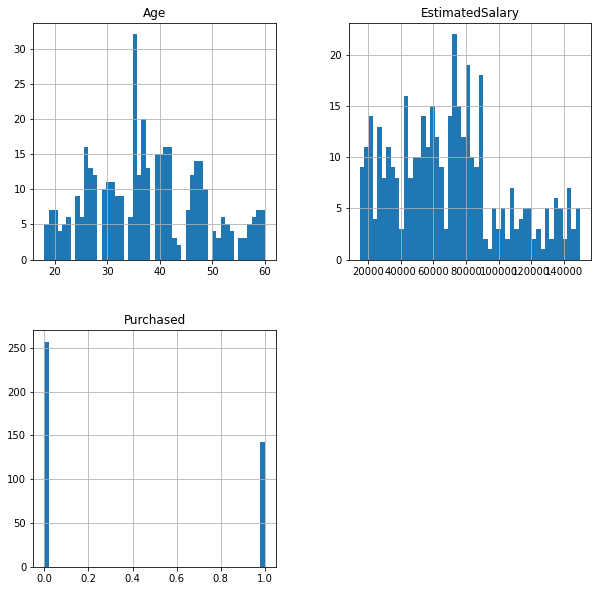

In [46]:
# Distribution in attributes
%matplotlib inline
import matplotlib.pyplot as plt
df.hist(bins=50, figsize=(10,10))
plt.show()

Explore the ages of the people who responded to the social media ads and bought the product

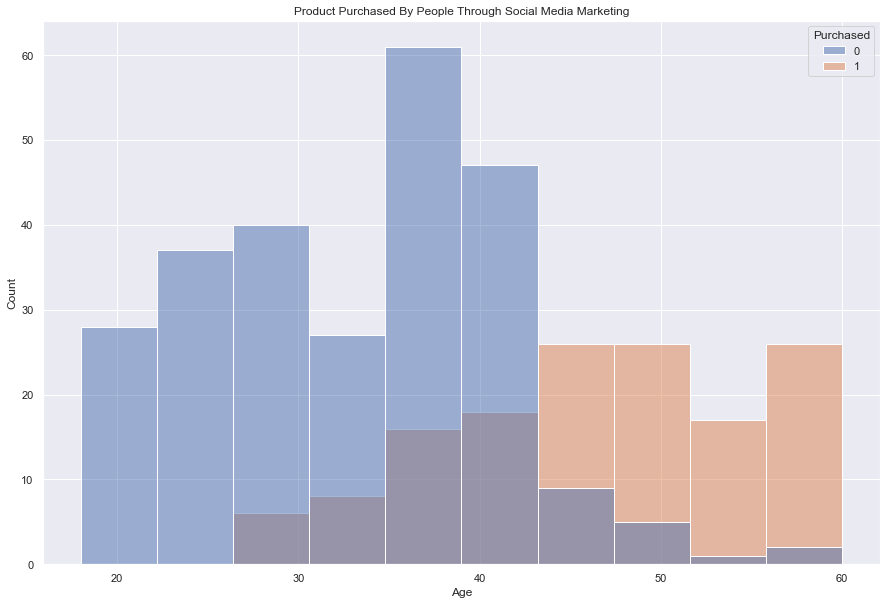

In [117]:
import matplotlib.pyplot as plt
plt.figure(figsize=(15, 10))
plt.title("Product Purchased By People Through Social Media Marketing")
sns.histplot(x="Age", hue="Purchased", data=df)
plt.show()

The visualization above shows that people over 45 among the target audience are more interested in purchasing the product. Now let’s take a look at the income group of people who responded to social media ads and purchased the product:

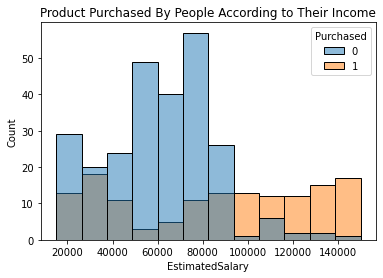

In [44]:
plt.title("Product Purchased By People According to Their Income")
sns.histplot(x="EstimatedSalary", hue="Purchased", data=df)
plt.show()

In [45]:
df.head()

,Age,EstimatedSalary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0
3,27,57000,0
4,19,76000,0


The visualization above shows that people with a monthly income of over 90,000 among the target audience are more interested in purchasing the product.

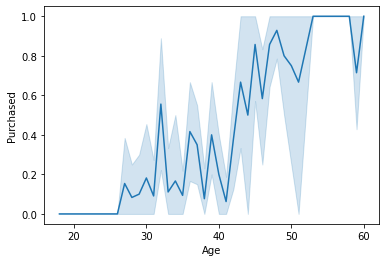

In [48]:
sns.lineplot(x='Age', y='Purchased', data=df)
plt.show()


### Histogram Insight: -

Histogram helps in identifying the following:
- View the shape of your data set’s distribution to look for outliers or other significant data points.

- Determine whether something significant has boccurred from one time period to another.

### Why Histogram? 

It is used to illustrate the major features of the distribution of the data in a convenient form. It is also useful when dealing with large data sets (greater than 100 observations). It can help detect any unusual observations (outliers) or any gaps in the data.

From the above graphical representation we can identify that the highest bar represents the outliers which is above the maximum range.

We can also identify that the values are moving on the right side, which determines positive and the centered values determines normal skewness.

# 2. Distplot

A Distplot or distribution plot, depicts the variation in the data distribution. Seaborn Distplot represents the overall distribution of continuous data variables. The Seaborn module along with the Matplotlib module is used to depict the distplot with different variations in it 

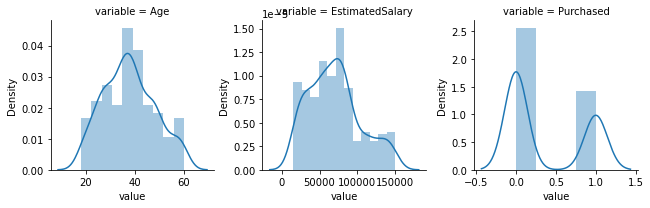

In [47]:
num = [f for f in df.columns if df.dtypes[f] != 'object']
nd = pd.melt(df, value_vars = num)
n1 = sns.FacetGrid (nd, col='variable', col_wrap=4, sharex=False, sharey = False)
n1 = n1.map(sns.distplot, 'value')
n1

In [48]:
columns1 = df.columns.tolist()
for i in columns1:
    print(df[i].skew())

0.23133746309642822
0.49502362888993623
0.596902836080957


### Distplot Insights: -

Above is the distrution bar graphs to confirm about the statistics of the data about the skewness, the above results are:
3 columns are positive skewed
In some cases we'll need to log transform this variable so that it becomes normally distributed. A normally distributed (or close to normal) target variable helps in better modeling the relationship between target and independent variables

### Why Distplot?
Skewness is demonstrated on a bell curve when data points are not distributed symmetrically to the left and right sides of the median on a bell curve. If the bell curve is shifted to the left or the right, it is said to be skewed.

We can observe that the bell curve is shifted to left we indicates positive skewness.As all the column are positively skewed we don't need to do scaling.

Let's proceed and check the distribution of the target variable.


#### The target variable is positively skewed and its value is very close to 0 so no need to transform it.A normally distributed (or close to normal) target variable helps in better modeling the relationship between target and independent variables. 

# 3. Heatmap




A heatmap (or heat map) is a graphical representation of data where values are depicted by color.Heatmaps make it easy to visualize complex data and understand it at a glance 

__Correlation__ - A positive correlation is a relationship between two variables in which both variables move in the same direction. Therefore, when one variable increases as the other variable increases, or one variable decreases while the other decreases.

Correlation can have a value:

- 1 is a perfect positive correlation
- 0 is no correlation (the values don't seem linked at all)
- -1 is a perfect negative correlation



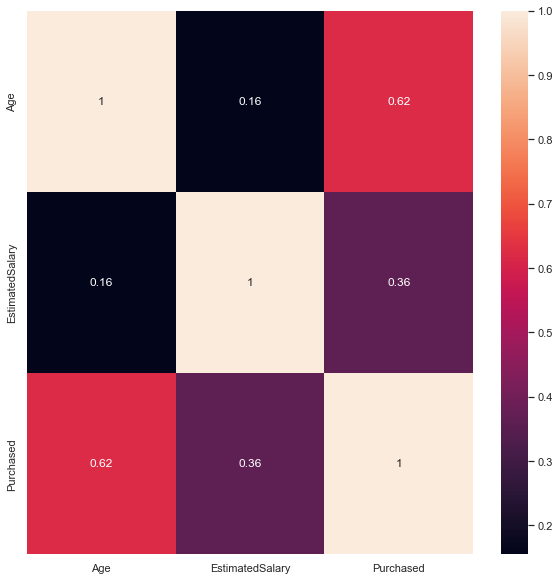

In [51]:
#correlation plot
sns.set(rc = {'figure.figsize':(10,10)})
corr = df.corr().abs()
sns.heatmap(corr,annot=True) 
plt.show()

### Notice the last column from right side of this map. We can see the correlation of all variables against diagnosis. As you can see, some variables seem to be strongly correlated with the target variable. Here, a numeric correlation score will help us understand the graph better.

In [52]:
corr

,Age,EstimatedSalary,Purchased
Age,1.000000,0.155238,0.622454
EstimatedSalary,0.155238,1.000000,0.362083
Purchased,0.622454,0.362083,1.000000


### Heatmap insights: -

As we know, it is recommended to avoid correlated features in your dataset. Indeed, a group of highly correlated features will not bring additional information (or just very few), but will increase the complexity of the algorithm, hence increasing the risk of errors.




### Why Heatmap?

Heatmaps are used to show relationships between two variables, one plotted on each axis. By observing how cell colors change across each axis, you can observe if there are any patterns in value for one or both variables.

# 4. Boxplot

A boxplot is a standardized way of displaying the distribution of data based on a five number summary (“minimum”, first quartile [Q1], median, third quartile [Q3] and “maximum”).

Basically, to find the outlier in a dataset/column.

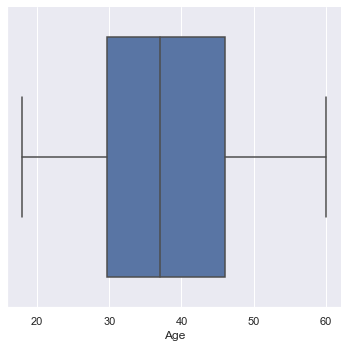

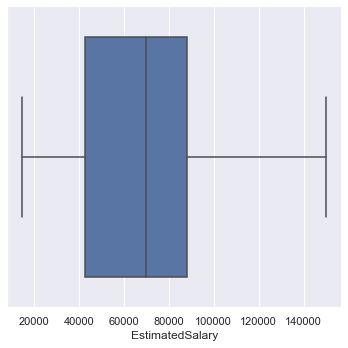

In [53]:

features = ['Age', 'EstimatedSalary']
for value in features:
    sns.catplot(data=df, x=value,  kind="box")

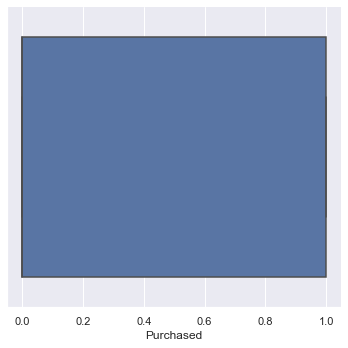

In [54]:
#for target variable
sns.catplot(data=df, x='Purchased', kind='box')

#### The dark points are known as Outliers. Outliers are those data points that are significantly different from the rest of the dataset. They are often abnormal observations that skew the data distribution, and arise due to inconsistent data entry, or erroneous observations.

### Boxplot Insights: - 
- Sometimes outliers may be an error in the data and should be removed. In this case these points are correct readings yet they are different from the other points that they appear to be incorrect.

- The best way to decide wether to remove them or not is to train models with and without these data points and compare their validation accuracy.

- So we will keep it unchanged as it won't affect our model.

**Here, we can see that there are no outliers.**
### Why Boxplot?
Box plots are used to show distributions of numeric data values, especially when you want to compare them between multiple groups. They are built to provide high-level information at a glance, offering general information about a group of data's symmetry, skew, variance, and outliers.



In the next step we will divide our cleaned data into training data and testing data.

# Step 2: Data Preparation
**Goal:-**

Tasks we are going to in this step:

1. Now we will spearate the target variable and feature columns in two different dataframe and will check the shape of the dataset for validation purpose.
2. Split dataset into train and test dataset.
3. Scaling on train dataset.

**1. Now we spearate the target variable and feature columns in two different dataframe and will check the shape of the dataset for validation purpose.**

In [55]:
# Separate target and feature column in X and y variable

target = 'Purchased'

# X will be the features
X = df.drop(target,axis=1) 
#y will be the target variable
y = df[target]

In [56]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   Age              400 non-null    int64
 1   EstimatedSalary  400 non-null    int64
dtypes: int64(2)
memory usage: 6.4 KB


In [57]:
y

0      0
1      0
2      0
3      0
4      0
      ..
395    1
396    1
397    1
398    0
399    1
Name: Purchased, Length: 400, dtype: int64

In [58]:
# Check the shape of X and y variable
X.shape, y.shape

((400, 2), (400,))

In [59]:
# Reshape the y variable 
y = y.values.reshape(-1,1)

In [60]:
# Again check the shape of X and y variable
X.shape, y.shape

((400, 2), (400, 1))

#### 2. Spliting the dataset in training and testing data. 

*Here we are spliting our dataset into 80/20 percentage where 80% dataset goes into the training part and 20% goes into testing  part.*

In [61]:
# Split the X and y into X_train, X_test, y_train, y_test variables with 80-20% split.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [62]:
# Check shape of the splitted variables
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((320, 2), (80, 2), (320, 1), (80, 1))

### Insights: -

Train test split technique is used to estimate the performance of machine learning algorithms which are used to make predictions on data not used to train the model.It is a fast and easy procedure to perform, the results of which allow you to compare the performance of machine learning algorithms for your predictive modeling problem. Although simple to use and interpret, there are times when the procedure should not be used, such as when you have a small dataset and situations where additional configuration is required, such as when it is used for classification and the dataset is not balanced.

In the next step we will train our model on the basis of our training and testing data.

# Step 3: Model Training

#### Goal:
In this step we are going to train our dataset on different classification algorithms. As we know that our target variable is in discrete format so we have to apply classification algorithm. Target variable is a category like filtering.In our dataset we have the outcome variable or Dependent variable i.e Y having only two set of values, either M (Malign) or B(Benign). So we will use Classification algorithm**

__Algorithms we are going to use in this step__

1. Logistic Regression
2. K Nearest Neighbor
3. Random Forest Classification

K-fold cross validation is a procedure used to estimate the skill of the model on new data. There are common tactics that you can use to select the value of k for your dataset. There are commonly used variations on cross-validation, such as stratified and repeated, that are available in scikit-learn

In [63]:
# Define kfold with 10 split
cv = KFold(n_splits=10, shuffle=True, random_state=42)

The goal of cross-validation is to test the model's ability to predict new data that was not used in estimating it, in order to flag problems like overfitting or selection bias and to give an insight on how the model will generalize to an independent dataset (i.e., an unknown dataset, for instance from a real problem).

# 1. Logistic Regression

Logistic regression is one of the most popular Machine Learning algorithms, which comes under the Supervised Learning technique. It is used for predicting the categorical dependent variable using a given set of independent variables.

Logistic regression predicts the output of a categorical dependent variable. Therefore the outcome must be a categorical or discrete value. It can be either Yes or No, 0 or 1, true or False, etc. but instead of giving the exact value as 0 and 1, it gives the probabilistic values which lie between 0 and 1.

#### Train set cross-validation 

In [64]:
#Using Logistic Regression Algorithm to the Training Set
from sklearn.linear_model import LogisticRegression

log_R = LogisticRegression() #Object Creation

log_R.fit(X_train, y_train)

LogisticRegression()

In [65]:
#Accuracy check of trainig data

#Get R2 score
log_R.score(X_train, y_train)


0.640625

In [66]:
#Accuracy of test data
log_R.score(X_test, y_test) 

0.65

In [67]:
# Getting kfold values
lg_scores = -1 * cross_val_score(log_R, 
                                 X_train, 
                                 y_train, 
                                 cv=cv, 
                                 scoring='neg_root_mean_squared_error')
lg_scores

array([0.55901699, 0.55901699, 0.39528471, 0.61237244, 0.55901699,
       0.58630197, 0.55901699, 0.63737744, 0.61237244, 0.63737744])

In [68]:
# Mean of the train kfold scores
lg_score_train = np.mean(lg_scores)
lg_score_train

0.5717154404788551

### Prediction 

Now we will perform prediction on the dataset using Logistic Regression.

In [69]:
# Predict the values on X_test_scaled dataset 
y_predicted = log_R.predict(X_test)

## Various parameters are calculated for analysing the predictions.

1) Confusion Matrix
2)Classification Report
3)Accuracy Score
4)Precision Score
5)Recall Score
6)F1 Score

## Confusion Matrix

A confusion matrix presents a table layout of the different outcomes of the prediction and results of a classification problem and helps visualize its outcomes. It plots a table of all the predicted and actual values of a classifier.

#### This diagram helps in understanding the concept of confusion matrix. 

In [70]:
# Constructing the confusion matrix.
from sklearn.metrics import confusion_matrix

In [71]:
#confusion matrix btw y_test and y_predicted
cm = confusion_matrix(y_test,y_predicted)

<AxesSubplot:>

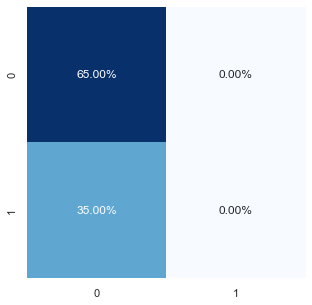

In [72]:
sns.set(rc = {'figure.figsize':(5,5)})
sns.heatmap(cm/np.sum(cm), annot=True, 
            fmt='.2%', cmap='Blues', cbar = False)

## Evaluating all kinds of evaluating parameters. 

#### Classification Report :
A classification report is a performance evaluation metric in machine learning. It is used to show the precision, recall, F1 Score, and support of your trained classification model. 

#### F1_score :
The F1 score is a machine learning metric that can be used in classification models. 

#### Precision_score :
The precision is the ratio tp / (tp + fp) where tp is the number of true positives and fp the number of false positives. The precision is intuitively the ability of the classifier not to label as positive a sample that is negative. The best value is 1 and the worst value is 0.

#### Recall_score :
Recall score is used to measure the model performance in terms of measuring the count of true positives in a correct manner out of all the actual positive values. Precision-Recall score is a useful measure of success of prediction when the classes are very imbalanced.

In [73]:
# Evaluating the classifier
# printing every score of the classifier
# scoring in anything
from sklearn.metrics import classification_report 
from sklearn.metrics import f1_score, accuracy_score, precision_score,recall_score
from sklearn.metrics import confusion_matrix
  

print("The model used is Logistic Regression")
  
l_acc = accuracy_score(y_test, y_predicted)
print("\nThe accuracy is: {}".format(l_acc))
  
prec = precision_score(y_test, y_predicted)
print("The precision is: {}".format(prec))
  
rec = recall_score(y_test, y_predicted)
print("The recall is: {}".format(rec))
  
f1 = f1_score(y_test, y_predicted)
print("The F1-Score is: {}".format(f1))
  
c1 = classification_report(y_test, y_predicted)
print("Classification Report is:")
print()
print(c1)

The model used is Logistic Regression

The accuracy is: 0.65
The precision is: 0.0
The recall is: 0.0
The F1-Score is: 0.0
Classification Report is:

              precision    recall  f1-score   support

           0       0.65      1.00      0.79        52
           1       0.00      0.00      0.00        28

    accuracy                           0.65        80
   macro avg       0.33      0.50      0.39        80
weighted avg       0.42      0.65      0.51        80



# 2. K Nearest Neighbor

K-Nearest Neighbour is one of the simplest Machine Learning algorithms based on Supervised Learning technique.
K-NN algorithm assumes the similarity between the new case/data and available cases and put the new case into the category that is most similar to the available categories.
K-NN algorithm stores all the available data and classifies a new data point based on the similarity. This means when new data appears then it can be easily classified into a well suite category by using K- NN algorithm

In [74]:
#Using KNeighborsClassifier Method of neighbors class to use Nearest Neighbor algorithm
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier()
classifier.fit(X_train, y_train)

KNeighborsClassifier()

In [75]:
#Accuracy check of trainig data
#Get R2 score
classifier.score(X_train, y_train)

0.88125

In [76]:
#Accuracy of test data
classifier.score(X_test, y_test) 

0.825

In [77]:
#Get kfold values
Nn_scores = -1 * cross_val_score(classifier, 
                                    X_train, 
                                    y_train, 
                                    cv=cv, 
                                    scoring='neg_root_mean_squared_error')
Nn_scores


array([0.4330127 , 0.46770717, 0.35355339, 0.4330127 , 0.5       ,
       0.30618622, 0.46770717, 0.4330127 , 0.46770717, 0.55901699])

In [78]:
# Mean of the train kfold scores
Nn_score_train = np.mean(Nn_scores)
Nn_score_train

0.4420916228533004

### Prediction

In [79]:
# Predict the values on X_test_scaled dataset 
y_predicted = classifier.predict(X_test)

In [80]:
# Constructing the confusion matrix.
from sklearn.metrics import confusion_matrix

In [81]:
#Confusion matrix btw y_test and y_predicted
cm = confusion_matrix(y_test,y_predicted)

<AxesSubplot:>

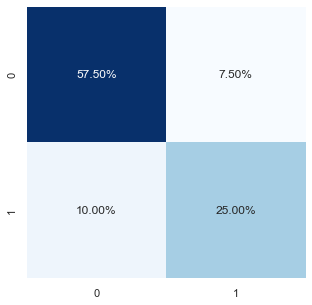

In [82]:
sns.heatmap(cm/np.sum(cm), annot=True, 
            fmt='.2%', cmap='Blues', cbar = False)

### Evaluating all kinds of evaluating parameters. 

In [83]:
# Evaluating the classifier
# printing every score of the classifier
# scoring in anything
from sklearn.metrics import classification_report 
from sklearn.metrics import f1_score, accuracy_score, precision_score,recall_score
from sklearn.metrics import confusion_matrix
  

print("The model used is KNeighbors Classifier")
  
k_acc = accuracy_score(y_test, y_predicted)
print("\nThe accuracy is: {}".format(k_acc))
  
prec = precision_score(y_test, y_predicted)
print("The precision is: {}".format(prec))
  
rec = recall_score(y_test, y_predicted)
print("The recall is: {}".format(rec))
  
f1 = f1_score(y_test, y_predicted)
print("The F1-Score is: {}".format(f1))
  
c1 = classification_report(y_test, y_predicted)
print("Classification Report is:")
print()
print(c1)    

The model used is KNeighbors Classifier

The accuracy is: 0.825
The precision is: 0.7692307692307693
The recall is: 0.7142857142857143
The F1-Score is: 0.7407407407407408
Classification Report is:

              precision    recall  f1-score   support

           0       0.85      0.88      0.87        52
           1       0.77      0.71      0.74        28

    accuracy                           0.82        80
   macro avg       0.81      0.80      0.80        80
weighted avg       0.82      0.82      0.82        80



# 3. Random Forest Classifier

Random Forest is a powerful and versatile supervised machine learning algorithm that grows and combines multiple decision trees to create a “forest.” It can be used for both classification and regression problems in R and Python.

Random Forest and Decision Tree Algorithm are considered best for the data that has outliers.

In [84]:
#Using RandomForestClassifier method of ensemble class to use Random Forest Classification algorithm

from sklearn.ensemble import RandomForestClassifier
#clas = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)
clas = RandomForestClassifier()
clas.fit(X_train, y_train)


RandomForestClassifier()

In [85]:
#Accuracy check of trainig data
#Get R2 score
clas.score(X_train, y_train)

0.996875

In [86]:
#Accuracy of test data
clas.score(X_test, y_test) 

0.9

In [87]:
# Get kfold values
Dta_scores = -1 * cross_val_score(clas, 
                                    X_train, 
                                    y_train, 
                                    cv=cv, 
                                    scoring='neg_root_mean_squared_error')
Dta_scores


array([0.35355339, 0.25      , 0.35355339, 0.39528471, 0.25      ,
       0.35355339, 0.30618622, 0.30618622, 0.25      , 0.39528471])

In [88]:
# Mean of the train kfold scores
Dta_score_train = np.mean(Dta_scores)
Dta_score_train

0.32136020225177103

### Prediction 

In [89]:
# predict the values on X_test_scaled dataset 
y_predicted = clas.predict(X_test)

In [90]:
# Constructing the confusion matrix.
from sklearn.metrics import confusion_matrix

In [91]:
#confusion matrix btw y_test and y_predicted
cm = confusion_matrix(y_test,y_predicted)

<AxesSubplot:>

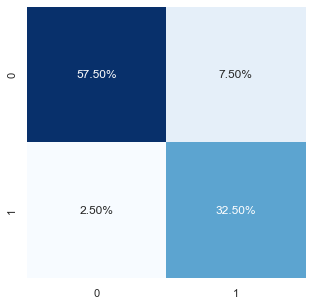

In [92]:
sns.heatmap(cm/np.sum(cm), annot=True, 
            fmt='.2%', cmap='Blues', cbar = False)

### Evaluating all kinds of evaluating parameters. 

In [93]:
# Evaluating the classifier
# printing every score of the classifier
# scoring in anything
from sklearn.metrics import classification_report 
from sklearn.metrics import f1_score, accuracy_score, precision_score,recall_score
from sklearn.metrics import confusion_matrix
  

print("The model used is Random Forest Classifier")
  
r_acc = accuracy_score(y_test, y_predicted)
print("\nThe accuracy is {}".format(r_acc))
  
prec = precision_score(y_test, y_predicted)
print("The precision is {}".format(prec))
  
rec = recall_score(y_test, y_predicted)
print("The recall is {}".format(rec))
  
f1 = f1_score(y_test, y_predicted)
print("The F1-Score is {}".format(f1))
 
c1 = classification_report(y_test, y_predicted)
print("Classification Report is:")
print()
print(c1)  

The model used is Random Forest Classifier

The accuracy is 0.9
The precision is 0.8125
The recall is 0.9285714285714286
The F1-Score is 0.8666666666666666
Classification Report is:

              precision    recall  f1-score   support

           0       0.96      0.88      0.92        52
           1       0.81      0.93      0.87        28

    accuracy                           0.90        80
   macro avg       0.89      0.91      0.89        80
weighted avg       0.91      0.90      0.90        80



# Insight: -

In [94]:
cal_metric=pd.DataFrame([l_acc,k_acc,r_acc],columns=["Score in percentage"])
cal_metric.index=['Logistic Regression',
                  'K-nearest Neighbors',
                  'Random Forest']
cal_metric

,Score in percentage
Logistic Regression,0.650
K-nearest Neighbors,0.825
Random Forest,0.900



- As you can see with our Random Forest Model(0.900 or 90.00%) we are getting a better result.
- So we gonna save our model with Random Forest Algorithm

# Step 4: Save Model
**Goal:- In this step we are going to save our model in pickel format file.**

In [109]:
import pickle
pickle.dump(log_R , open('Social_Media _Ads_prediction_Logistic.pkl', 'wb'))
pickle.dump(classifier , open('Social_Media _Ads_prediction_KNearest.pkl', 'wb'))
pickle.dump(clas , open('Social_Media _Ads_prediction_RandomForest.pkl', 'wb'))

In [110]:
import pickle

def model_prediction(features):
    
    pickled_model = pickle.load(open('Social_Media _Ads_prediction_RandomForest.pkl', 'rb'))
    Purchased = str(list(pickled_model.predict(features)))
    
    return str(f'He/She purcased = {Purchased}')

#### We can test our model by giving our own parameters or features to predict. 

In [114]:
Age = 19
EstimatedSalary = 20000

In [115]:
model_prediction([[Age,EstimatedSalary]])

'He/She purcased = [0]'

1 = Yes, 0 = No

# Step 5: After making model and checking its accuracy, we are going to deploy it in API/ Web App. 

This step holds a great importance as in this step we make a Web API which integrates our model and let it interacts with user.
The user simply put data he is asked to fill and our API will help in predicting.

### There are many methods to create Web Application like Flask, Streamlit, etc. We going to use streamlit to create API. Below is an API refrence. 

https://tinyurl.com/bdexnk6v

# Conclusion

Social media advertising is a form of digital advertising that serves paid ads to your target audience using social media platforms. After observing the problem statement we have build an efficient model to overcome it. The above model helps in predicting  whether a user purchased a particular product or not. It helps the advertising company in identifying the best customer for them. The accuracy for the prediction is 90%.  